<a href="https://colab.research.google.com/github/txc-000/machine-learning/blob/main/04a_asl_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os

os.makedirs("data/asl_data", exist_ok=True)


In [3]:
!mkdir -p data/asl_data

In [4]:
from google.colab import files
uploaded = files.upload()

Saving sign_mnist_test.csv to sign_mnist_test.csv
Saving sign_mnist_train.csv to sign_mnist_train.csv


In [5]:
import shutil

shutil.move("sign_mnist_train.csv", "data/asl_data/sign_mnist_train.csv")
shutil.move("sign_mnist_test.csv", "data/asl_data/sign_mnist_valid.csv")

'data/asl_data/sign_mnist_valid.csv'

In [7]:
import tensorflow.keras as keras
import pandas as pd

# Load in our data from CSV files
train_df = pd.read_csv("data/asl_data/sign_mnist_train.csv")
valid_df = pd.read_csv("data/asl_data/sign_mnist_valid.csv")

# Separate out our target values
y_train = train_df['label']
y_valid = valid_df['label']
del train_df['label']
del valid_df['label']

# Separate our our image vectors
x_train = train_df.values
x_valid = valid_df.values

num_classes = y_train.max() + 1  # Otomatis jumlah kelas (maks label + 1)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes)


# Normalize our image data
x_train = x_train / 255
x_valid = x_valid / 255

# Reshape the image data for the convolutional network
x_train = x_train.reshape(-1,28,28,1)
x_valid = x_valid.reshape(-1,28,28,1)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    MaxPool2D,
    Flatten,
    Dropout,
    BatchNormalization,
)

model = Sequential()
model.add(Conv2D(75, (3, 3), strides=1, padding="same", activation="relu",
                 input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(50, (3, 3), strides=1, padding="same", activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(25, (3, 3), strides=1, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Flatten())
model.add(Dense(units=512, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=num_classes, activation="softmax"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=0.1,  # Randomly zoom image
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images horizontally
    vertical_flip=False, # Don't randomly flip images vertically
)


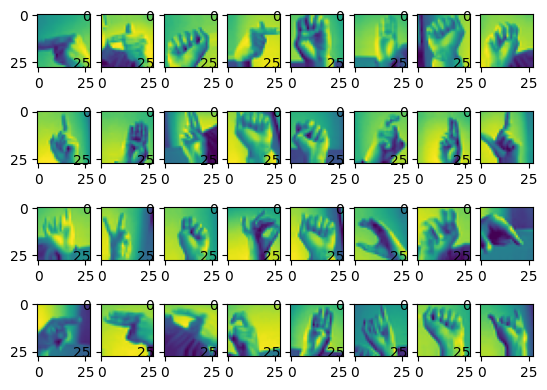

In [11]:
import matplotlib.pyplot as plt
import numpy as np
batch_size = 32
img_iter = datagen.flow(x_train, y_train, batch_size=batch_size)

x, y = next(img_iter)
fig, ax = plt.subplots(nrows=4, ncols=8)
for i in range(batch_size):
    image = x[i]
    ax.flatten()[i].imshow(np.squeeze(image))
plt.show()


In [12]:
datagen.fit(x_train)

In [13]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
model.fit(
    img_iter,
    epochs=20,
    steps_per_epoch=len(x_train) // batch_size,  # pastikan integer
    validation_data=(x_valid, y_valid)
)


Epoch 1/20
857/857 ━━━━━━━━━━━━━━━━━━━━ 124s 141ms/step - accuracy: 0.4560 - loss: 1.7982 - val_accuracy: 0.7422 - val_loss: 0.7467
Epoch 2/20
  1/857 ━━━━━━━━━━━━━━━━━━━━ 1:29 104ms/step - accuracy: 0.8438 - loss: 0.4278

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


857/857 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.8438 - loss: 0.4278 - val_accuracy: 0.7344 - val_loss: 0.7529
Epoch 3/20
857/857 ━━━━━━━━━━━━━━━━━━━━ 127s 136ms/step - accuracy: 0.8749 - loss: 0.3654 - val_accuracy: 0.9393 - val_loss: 0.1923
Epoch 4/20
857/857 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9375 - loss: 0.1679 - val_accuracy: 0.9346 - val_loss: 0.1718
Epoch 5/20
857/857 ━━━━━━━━━━━━━━━━━━━━ 139s 139ms/step - accuracy: 0.9294 - loss: 0.2083 - val_accuracy: 0.8689 - val_loss: 0.4791
Epoch 6/20
857/857 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9375 - loss: 0.2558 - val_accuracy: 0.9244 - val_loss: 0.2401
Epoch 7/20
857/857 ━━━━━━━━━━━━━━━━━━━━ 133s 134ms/step - accuracy: 0.9504 - loss: 0.1534 - val_accuracy: 0.8752 - val_loss: 0.4691
Epoch 8/20
857/857 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9688 - loss: 0.0589 - val_accuracy: 0.9610 - val_loss: 0.0988
Epoch 9/20
857/857 ━━━━━━━━━━━━━━━━━━━━ 135s 138ms/step - accuracy: 0.9583 - loss: 0.1288 - val_acc

In [18]:
model.save('asl_model.h5')  # format HDF5 legacy


In [19]:
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}